In [46]:
import pandas_datareader as pdr

In [47]:
key='0d96e0d715738cdf202e541c9b9fc18355450df2'

In [48]:
df = pdr.get_data_tiingo('AAPL',api_key=key)
df.to_csv('AAPL.csv')

In [49]:
import pandas as pd


In [50]:
df = pd.read_csv('AAPL.csv')

In [51]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-03-07 00:00:00+00:00,101.87,102.83,100.96,102.39,35915810,23.683424,23.906611,23.471861,23.804317,143663240,0.0,1.0
1,AAPL,2016-03-08 00:00:00+00:00,101.03,101.76,100.40,100.78,31182194,23.488135,23.657850,23.341668,23.430013,124728776,0.0,1.0
2,AAPL,2016-03-09 00:00:00+00:00,101.12,101.58,100.27,101.31,27201683,23.509059,23.616003,23.311445,23.553231,108806732,0.0,1.0
3,AAPL,2016-03-10 00:00:00+00:00,101.17,102.24,100.15,101.41,33513577,23.520683,23.769444,23.283547,23.576480,134054308,0.0,1.0
4,AAPL,2016-03-11 00:00:00+00:00,102.26,102.28,101.50,102.24,27408237,23.774094,23.778743,23.597404,23.769444,109632948,0.0,1.0


In [52]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2021-03-01 00:00:00+00:00,127.79,127.930,122.79,123.75,116307892,127.79,127.930,122.79,123.75,116307892,0.0,1.0
1255,AAPL,2021-03-02 00:00:00+00:00,125.12,128.720,125.01,128.41,102260945,125.12,128.720,125.01,128.41,102260945,0.0,1.0
1256,AAPL,2021-03-03 00:00:00+00:00,122.06,125.710,121.84,124.81,112966340,122.06,125.710,121.84,124.81,112966340,0.0,1.0
1257,AAPL,2021-03-04 00:00:00+00:00,120.13,123.600,118.62,121.75,178154975,120.13,123.600,118.62,121.75,178154975,0.0,1.0
1258,AAPL,2021-03-05 00:00:00+00:00,121.42,121.935,117.57,120.98,153766601,121.42,121.935,117.57,120.98,153766601,0.0,1.0


In [53]:
df1 = df.reset_index()['close']

In [54]:
df1.head()

0    101.87
1    101.03
2    101.12
3    101.17
4    102.26
Name: close, dtype: float64

In [55]:
df1.shape

(1259,)

In [56]:
import matplotlib.pyplot as plt


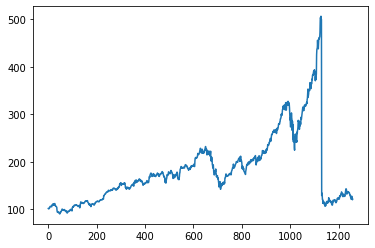

In [57]:
plt.plot(df1)

In [58]:
import numpy as np


In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler(feature_range=(0,1))

In [61]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [62]:
df1

array([[0.02773301],
       [0.02571257],
       [0.02592904],
       ...,
       [0.07629585],
       [0.07165364],
       [0.07475646]])

In [63]:
train_size = int(len(df1)*0.65)
train_size

818

In [64]:
test_size = len(df1) - train_size
test_size

441

In [65]:
train_data, test_data = df1[0:train_size,:] , df1[train_size:len(df1),:1]

In [66]:
train_data.shape, test_data.shape

((818, 1), (441, 1))

In [67]:
train_data.shape

(818, 1)

In [68]:
test_data.shape

(441, 1)

In [69]:
import numpy as np


In [70]:

def create_dataset(dataset, time_step):
  data_X, data_y = [], [] 
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    data_X.append(a)
    data_y.append(dataset[(i+time_step),0])
  
  return np.array(data_X), np.array(data_y)



In [71]:
X_train, y_train = create_dataset(train_data,100)
X_test, y_test = create_dataset(test_data,100)

In [72]:
X_train.shape, y_train.shape

((717, 100), (717,))

In [73]:
X_test.shape, y_test.shape

((340, 100), (340,))

In [74]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [76]:
model = Sequential()

In [77]:
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 102ms/step - loss: 0.0154 - val_loss: 0.0451
Epoch 2/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0020 - val_loss: 0.0210
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 7.7574e-04 - val_loss: 0.0194
Epoch 4/100
12/12 [==============================] - 0s 17ms/step - loss: 4.3364e-04 - val_loss: 0.0192
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 3.8867e-04 - val_loss: 0.0187
Epoch 6/100
12/12 [==============================] - 0s 17ms/step - loss: 3.5932e-04 - val_loss: 0.0182
Epoch 7/100
12/12 [==============================] - 0s 17ms/step - loss: 3.5994e-04 - val_loss: 0.0178
Epoch 8/100
12/12 [==============================] - 0s 18ms/step - loss: 3.7017e-04 - val_loss: 0.0175
Epoch 9/100
12/12 [==============================] - 0s 18ms/step - loss: 3.2580e-04 - val_loss: 0.0171
Epoch 10/100
12/12 [==============================] - 0s 18ms/step - lo

In [79]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [82]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [83]:
import math
from sklearn.metrics import mean_squared_error

In [85]:
mse_test = math.sqrt(mean_squared_error(y_train,train_predict))
mse_test

164.38118833647994

In [86]:
mse_test = math.sqrt(mean_squared_error(y_test,test_predict))
mse_test

263.40990957216997

In [87]:
look_back = 100


In [89]:
trainPredictPlot = np.empty_like(df1)
trainPredictPlot

array([[0.00000000e+000],
       [1.86437382e+065],
       [1.37073219e+288],
       ...,
       [1.06167112e-153],
       [6.05979437e+233],
       [1.03983890e-152]])

In [90]:
trainPredictPlot[:,:] = np.nan
trainPredictPlot

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [91]:
df1

array([[0.02773301],
       [0.02571257],
       [0.02592904],
       ...,
       [0.07629585],
       [0.07165364],
       [0.07475646]])

In [92]:
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

In [94]:
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[look_back+len(train_predict)+look_back+1:len(df1)-1,:] = test_predict

In [95]:
testPredictPlot

array([[         nan],
       [         nan],
       [         nan],
       ...,
       [125.33663177],
       [125.01161957],
       [         nan]])

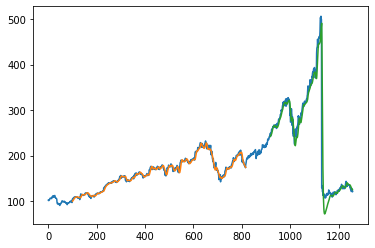

In [96]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [98]:
test_data.shape

(441, 1)

In [101]:
X_input = test_data[341:]
X_input = X_input.reshape(1,-1)
X_input.shape

(1, 100)

In [105]:
temp_input = list (X_input)
temp_input = temp_input[0].tolist()
temp_input

[0.08192423331328924,
 0.07398677089597111,
 0.07420324714371618,
 0.07304870715574258,
 0.06898376428141911,
 0.061671677690920024,
 0.06535177390258567,
 0.06381238725195432,
 0.06111846061334936,
 0.059410703547805144,
 0.05943475646422125,
 0.06316295850871917,
 0.05017438364401683,
 0.06008418520745634,
 0.04454600120264579,
 0.04432952495490078,
 0.04834636199639203,
 0.05919422730006013,
 0.06900781719783522,
 0.06819001803968727,
 0.062489476849067915,
 0.06164762477450386,
 0.0701142513529765,
 0.0694407696933253,
 0.06956103427540589,
 0.07206253758268188,
 0.06987372218881538,
 0.0666025255562237,
 0.06806975345760674,
 0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.09029464

In [106]:
n_steps = 100
i = 0

In [108]:
lst_output = []
while (i < 30):
  if (len(temp_input)>100):
     X_input = np.array(temp_input[1:])
     print("{} day input {}".format(i,X_input))
     X_input = X_input.reshape(1,-1)
     X_input = X_input.reshape((1,n_steps,1))
     y_hat = model.predict(X_input,verbose=0)
     print("{} day output {}".format(i,y_hat))
     temp_input.extend(y_hat[0].tolist())
     temp_input = temp_input[1:]
     lst_output.extend(y_hat.tolist())
  else:
    X_input = X_input.reshape((1,n_steps,1))
    y_hat = model.predict(X_input,verbose=0)
    print(y_hat[0])
    temp_input.extend(y_hat[0].tolist())
    print(len(temp_input))
    lst_output.extend(y_hat.tolist())
  i=i+1


[0.08127171]
101
1 day input [0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.04432952 0.04834636 0.05919423 0.06900782
 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103
 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841
 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925
 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341
 0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527 0.10710764
 0.10434155 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673
 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473
 0.09017438 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475
 0.12440168 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072
 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301
 0.10831028 0.10306675 0.09741431 0

In [112]:
np.array(lst_output).shape

(30, 1)

In [113]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [114]:
import matplotlib.pyplot as plt


In [115]:
len(df1)

1259

In [116]:
df3 = df1.tolist()

In [117]:
df3.extend(lst_output)

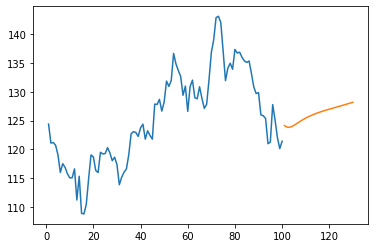

In [118]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()